In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [4]:
#importing iris dataset,creating dataframe and setting column names
from sklearn import datasets
data = datasets.load_iris()
df = pd.DataFrame({'x':data.data[:,0],'y':data.data[:,1],'cluster':data.target})
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


Text(0, 0.5, 'varience')

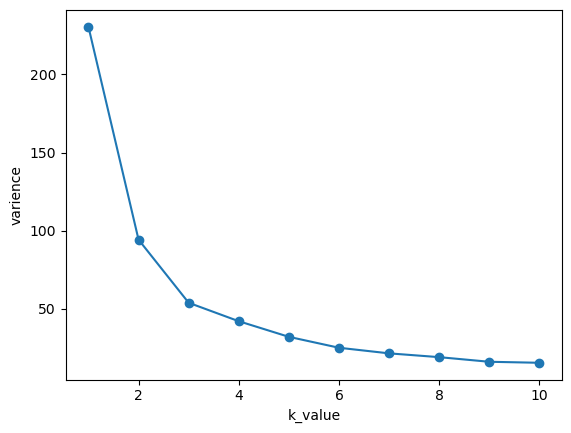

In [6]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn.cluster._kmeans')
varience=[]
for i in range(1,11):
    k=KMeans(n_clusters=i,random_state=0)
    k.fit(df)
    varience.append(k.inertia_)
plt.plot(range(1,11),varience,marker='o')
plt.xlabel('k_value')
plt.ylabel('varience')

Based on the graph, it is evident that the optimal number of clusters for the dataset is 3.

In [11]:
centroid={}
for i in range(3):
    list=[]
    list.append(df.loc[df['cluster']==i]['x'].mean())
    list.append(df.loc[df['cluster']==i]['y'].mean())
    centroid[i]=list

centroid

{0: [5.006, 3.428],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.974]}

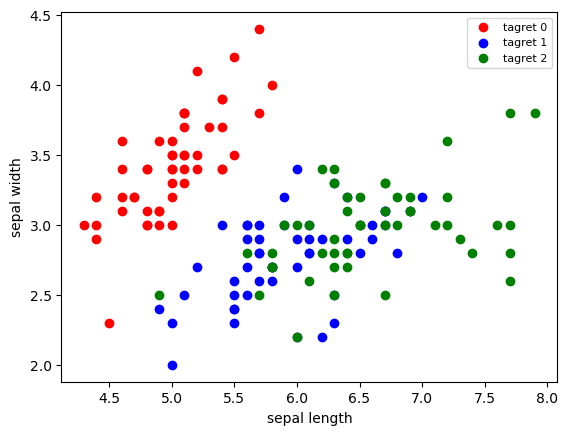

In [13]:
plt.scatter(df[df['cluster']==0]['x'],df[df['cluster']==0]['y'],color='r',label='tagret 0')
plt.scatter(df[df['cluster']==1]['x'],df[df['cluster']==1]['y'],color='b',label='tagret 1')
plt.scatter(df[df['cluster']==2]['x'],df[df['cluster']==2]['y'],color='g',label='tagret 2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(fontsize=8)


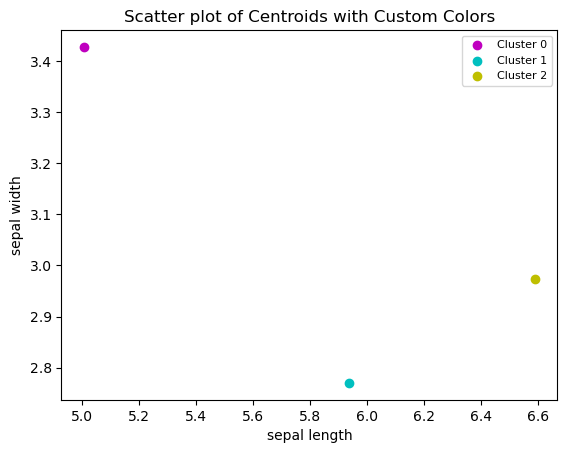

In [15]:
cmap = {0: 'm', 1: 'c', 2: 'y'}

for i in range(3):
    plt.scatter(centroid[i][0], centroid[i][1], color=cmap[i], label=f'Cluster {i}')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Scatter plot of Centroids with Custom Colors')
plt.legend(fontsize=8)
plt.show()


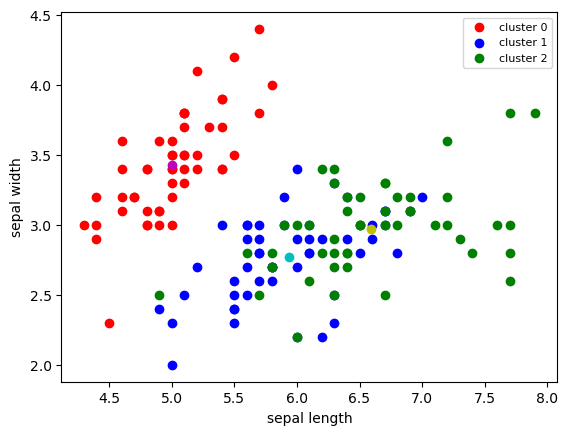

In [17]:
#plotting all datapoints and cluster point together 
plt.scatter(df[df['cluster']==0]['x'],df[df['cluster']==0]['y'],color='r',label='cluster 0')
plt.scatter(df[df['cluster']==1]['x'],df[df['cluster']==1]['y'],color='b',label='cluster 1')
plt.scatter(df[df['cluster']==2]['x'],df[df['cluster']==2]['y'],color='g',label='cluster 2')
cmap = {0: 'm', 1: 'c', 2: 'y'}

for i in range(3):
    plt.scatter(centroid[i][0], centroid[i][1], color=cmap[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(fontsize=8)


In [19]:
def assignment(df,centroid):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroid[i][0]) ** 2
                + (df['y'] - centroid[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroid.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: cmap[x])
    return df

In [21]:
df=assignment(df,centroid)

In [23]:
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,m
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,m
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,m
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,m
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,m
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,y
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,c
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,y
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,y


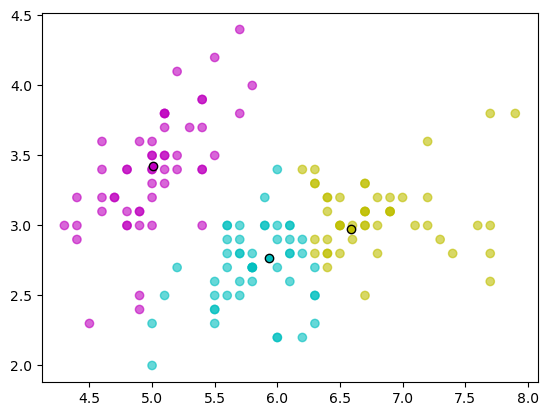

In [25]:
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.6)
for i in centroid.keys():
    plt.scatter(centroid[i][0],centroid[i][1], color=cmap[i], edgecolor='k')

finding new centroids

In [28]:
def new(k):
     for i in range(3):
         centroid[i][0]=np.mean(df[df['closest']==i]['x'])
         centroid[i][1]=np.mean(df[df['closest']==i]['y'])
     return k

In [30]:
centroid=new(centroid)
centroid

{0: [5.009433962264151, 3.3830188679245285],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333333, 3.06875]}

In [32]:
df = assignment(df, centroid)

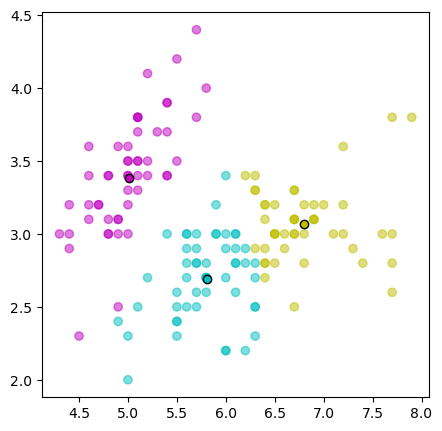

In [34]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5)
for i in centroid.keys():
    plt.scatter(centroid[i][0],centroid[i][1], color=cmap[i], edgecolor='k')
plt.show()

In [36]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = new(centroid)
    df = assignment(df, centroid)
    if closest_centroids.equals(df['closest']):
        break

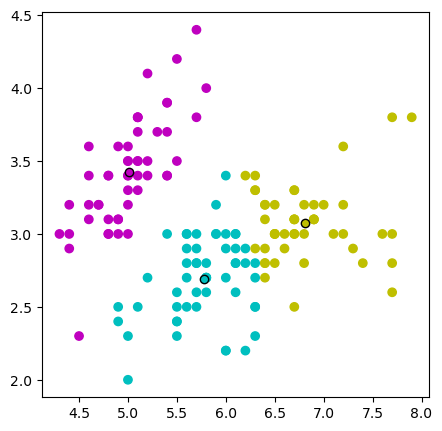

In [38]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroid.keys():
    plt.scatter(centroid[i][0],centroid[i][1], color=cmap[i], edgecolor='k')

plt.show()